# Resampling Methods

### Student: Rodolfo Lerma

# Learning Objectives
- Evaluate performance of the selected model.
- Use k-fold cross validation to compare the performance of a pair of models.
-  Use repeated k-fold cross validation to compare the performance of a pair of models.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Secom.csv')

C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,8,9,10,11,12,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,43,44,45,46,47,48,50,51,53,54,55,56,57,58,75,76,77,78,79,80,81,82,83,89,90,92,93,103,104,118,136,144,145,146,147,148,150,151,152,153,154,155,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,190,191,192,193,194,195,210,211,212,213,214,215,216,217,218,224,225,227,228,238,239,253,270,271,279,280,281,282,283,285,286,287,288,289,290,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,326,327,328,329,330,331,348,349,350,351,352,353,354,355,356,362,363,365,366,376,377,391,408,409,417,418,419,420,421,423,424,425,426,427,428,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,462,463,464,465,466,467,482,483,484,485,486,487,488

In [3]:
data.head()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 582,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
0,3030.93,2564,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,...,!,0.5005,0.0118,0.0035,2.363,!,!,!,!,1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.006,208.2045,1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2988.72,2479.9,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.499,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,3032.24,2502.87,2233.3667,1326.52,1.5334,100,100.3967,0.1235,1.5031,-0.0031,...,!,0.48,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1


In [4]:
data.shape

(1567, 591)

In [5]:
data['Target'].unique()

array([1, 0], dtype=int64)

### Question 1.1: Detect and replace missing values in the data with np.nan . Hint: missing data is noted as !

In [6]:
#data.replace('!', np.nan, inplace=True)
data.replace(to_replace=r' *\!', value=np.nan, inplace=True, regex=True)

Question 1.2 Confirm that the change has worked

In [7]:
data.head()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 582,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
0,3030.93,2564,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.363,NaN,NaN,NaN,NaN,1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.006,208.2045,1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2988.72,2479.9,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.499,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,3032.24,2502.87,2233.3667,1326.52,1.5334,100,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.48,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1


In [8]:
data.tail()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 582,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100,82.2467,0.1248,1.3424,-0.0045,...,203.172,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.172,1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100,98.4689,0.1205,1.4333,-0.0061,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.172,1
1564,2978.81,2379.78,2206.3,1110.4967,0.8236,100,99.4122,0.1208,NaN,NaN,...,43.5231,0.4987,0.0153,0.0041,3.059,0.0197,0.0086,0.0025,43.5231,1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,1
1566,2944.92,2450.76,2195.4444,2914.1792,1.5978,100,85.1011,0.1235,NaN,NaN,...,137.7844,0.4987,0.0181,0.004,3.6275,0.0117,0.0162,0.0045,137.784,1


In [9]:
columns = data.columns.tolist()
for i in columns:
    data[i] = pd.to_numeric(data[i])

In [10]:
df = data.describe()
df

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 582,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,0.933631
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.249005
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


Before we transform the data adding extra zeros, it is possible to see that we have some sensors giving repeated data (Ex. Sensor_6). These columns are going to be removed.

### Repeated Values (Columns with the same value)

In [11]:
not_repeated = []
repeated = []
updated_columns = data.columns.values.tolist()
y = data.shape
for i in updated_columns:
    x = data[i].std()
    if x == 0:
        repeated.append(i)
    else:
        not_repeated.append(i)

In [12]:
data[repeated].describe()

,Sensor 6,Sensor 14,Sensor 43,Sensor 50,Sensor 53,Sensor 70,Sensor 98,Sensor 142,Sensor 150,Sensor 179,...,Sensor 530,Sensor 531,Sensor 532,Sensor 533,Sensor 534,Sensor 535,Sensor 536,Sensor 537,Sensor 538,Sensor 539
count,1553.0,1564.0,1566.0,1566.0,1566.0,1561.0,1561.0,1553.0,1564.0,1543.0,...,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0
mean,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
data = data.drop(repeated, axis = 1)
data.shape

(1567, 474)

It is possible to see that **117 sensors** had repeated data (same value for all the measurements/rows)

### Missing Values (Columns with the missing more than 33% of the data)

In [14]:
missing_values = []
my_list = data.columns.values.tolist()
y = data.shape
for i in my_list:
    x = data[i].isnull().sum()
    missing_values.append(x)
    
columns_missing = dict(zip(my_list, missing_values))
a = sorted(columns_missing.items(), key=lambda x: x[1], reverse = True)  

In [15]:
missing_columns_names = []
for key, value in columns_missing.items():
    if value > (data.shape[0])/2 : #15% of the data
        x = key
        missing_columns_names.append(x)

In [16]:
print(missing_columns_names)

['Sensor 73', 'Sensor 74', 'Sensor 86', 'Sensor 110', 'Sensor 111', 'Sensor 112', 'Sensor 113', 'Sensor 158', 'Sensor 159', 'Sensor 221', 'Sensor 245', 'Sensor 246', 'Sensor 247', 'Sensor 248', 'Sensor 293', 'Sensor 294', 'Sensor 346', 'Sensor 347', 'Sensor 359', 'Sensor 383', 'Sensor 384', 'Sensor 385', 'Sensor 386', 'Sensor 493', 'Sensor 517', 'Sensor 518', 'Sensor 519', 'Sensor 520', 'Sensor 579', 'Sensor 580', 'Sensor 581', 'Sensor 582']


In [17]:
data = data.drop(missing_columns_names, axis = 1)
data.shape

(1567, 442)

It is possible to see that **X sensors** had more than 50% of missing data.

### Question 1.3: Fill the missing values with zeroes

In [18]:
data.fillna(0, inplace=True)

In [19]:
#Validate that the missing values were replaced
data.head()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11,...,Sensor 578,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1


In [20]:
data.tail()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11,...,Sensor 578,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,-0.0093,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,0.0000,0.0000,0.0000,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,0.0032,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,1
1566,2944.92,2450.76,2195.4444,2914.1792,1.5978,85.1011,0.1235,0.0000,0.0000,0.0000,...,22.9183,0.4987,0.0181,0.0040,3.6275,0.0117,0.0162,0.0045,137.7844,1


In [21]:
data.isnull().sum()

Sensor 1      0
Sensor 2      0
Sensor 3      0
Sensor 4      0
Sensor 5      0
Sensor 7      0
Sensor 8      0
Sensor 9      0
Sensor 10     0
Sensor 11     0
Sensor 12     0
Sensor 13     0
Sensor 15     0
Sensor 16     0
Sensor 17     0
Sensor 18     0
Sensor 19     0
Sensor 20     0
Sensor 21     0
Sensor 22     0
Sensor 23     0
Sensor 24     0
Sensor 25     0
Sensor 26     0
Sensor 27     0
Sensor 28     0
Sensor 29     0
Sensor 30     0
Sensor 31     0
Sensor 32     0
             ..
Sensor 558    0
Sensor 559    0
Sensor 560    0
Sensor 561    0
Sensor 562    0
Sensor 563    0
Sensor 564    0
Sensor 565    0
Sensor 566    0
Sensor 567    0
Sensor 568    0
Sensor 569    0
Sensor 570    0
Sensor 571    0
Sensor 572    0
Sensor 573    0
Sensor 574    0
Sensor 575    0
Sensor 576    0
Sensor 577    0
Sensor 578    0
Sensor 583    0
Sensor 584    0
Sensor 585    0
Sensor 586    0
Sensor 587    0
Sensor 588    0
Sensor 589    0
Sensor 590    0
Target        0
Length: 442, dtype: int6

In [22]:
data.shape

(1567, 442)

In [23]:
columns = data.columns.tolist()
for i in columns:
    data[i] = pd.to_numeric(data[i])

In [24]:
data.describe()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11,...,Sensor 578,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3002.910638,2484.700932,2180.887035,1383.901023,4.159516,100.209538,0.121122,1.460995,-0.000840,0.000146,...,16.642363,0.499777,0.015308,0.003844,3.065869,0.021445,0.016464,0.005280,99.606461,0.933631
std,200.204648,184.815753,209.206773,458.937272,56.104457,11.363940,0.012831,0.090461,0.015107,0.009296,...,12.485267,0.013084,0.017179,0.003721,3.577730,0.012366,0.008815,0.002869,93.895701,0.249005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.053400,-0.034900,...,4.582000,0.000000,0.000000,0.000000,0.000000,-0.016900,0.000000,0.000000,0.000000,0.000000
25%,2965.670000,2451.515000,2180.700000,1080.116050,1.011000,97.762200,0.121100,1.410950,-0.010800,-0.005600,...,11.501550,0.497900,0.011600,0.003100,2.306200,0.013400,0.010600,0.003300,44.368600,1.000000
50%,3010.920000,2498.910000,2200.955600,1283.436800,1.310100,101.492200,0.122400,1.461500,-0.001300,0.000400,...,13.817900,0.500200,0.013800,0.003600,2.757600,0.020500,0.014800,0.004600,71.778000,1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.518800,104.530000,0.123800,1.516850,0.008400,0.005900,...,17.080900,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,129.252200,0.128600,1.656400,0.074900,0.053000,...,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Target',data=data)
plt.show()

<Figure size 640x480 with 1 Axes>

### Question 2.1: Split the data into Training and testing. Make your test size = 0.2 and your random_state = 42.

**Assumption:**
- There is another unseen set of data that will be used for the final Test once the model and hyperparameters are selected thru the train/validation set.

In [26]:
columns.remove('Target')
features = data[columns]
target = data['Target']

In [27]:
#First split the Training/Validation and the Testing Set
#X_train_val, X_test_final, y_train_val, y_test_final = train_test_split(features, target, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Question 2.2: Fit a logistic regression model on the training data. Predict the test data and plot the ROC curve

## To do list:
- Scale the data
    - Ensure that is done per cross validation fold
- Do some Feature Selection based on values

In [28]:
from sklearn.linear_model import LogisticRegression
# log_reg = LogisticRegression(class_weight = 'balanced', solver = 'saga',max_iter = 1000)
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [29]:
y_pred = lr.predict(X_test)

### Plot ROC Curve

Accuracy: 0.8980891719745223
AUC: 0.5399425287356323


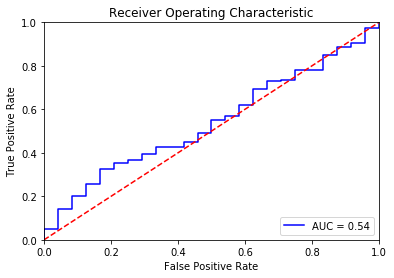

In [30]:
# Plot outputs
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
lr_acc = accuracy_score(y_test, y_pred)

# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.roc_auc_score(y_test, preds)
print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Question 2.2: Apply RFE with a logistic regression model on the training data testing out different number of features. Predict the test data and plot the ROC curve.

# Note:
Since we are using Recursive Feature Elimination, it is critical to do some data scaling to help on the convergance.

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std_scaled = scaler.transform(X_train)
X_test_std_scaled = scaler.transform(X_test)

In [32]:
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score

model = LogisticRegression(solver='lbfgs', max_iter= 10000, random_state=5)

options = [2,5,10,50]
accuracy = []
precision = []
recall = []
for i in options:
    rfe = RFE(model, n_features_to_select = i)
    rfe.fit(X_train_std_scaled, y_train)
    y_pred = rfe.predict(X_test_std_scaled)
    lr_acc = accuracy_score(y_test, y_pred)   
    lr_precision = precision_score(y_test, y_pred)
    lr_recall = recall_score(y_test, y_pred)
    accuracy.append(lr_acc)
    precision.append(lr_precision)
    recall.append(lr_recall)
    print("\n# of RFE:",i,"Accuracy:", round(lr_acc,4), ",Precision:", round(lr_precision,4), ",Recall:", round(lr_recall,4))


# of RFE: 2 Accuracy: 0.9236 ,Precision: 0.9236 ,Recall: 1.0

# of RFE: 5 Accuracy: 0.9236 ,Precision: 0.9236 ,Recall: 1.0

# of RFE: 10 Accuracy: 0.9236 ,Precision: 0.9236 ,Recall: 1.0

# of RFE: 50 Accuracy: 0.9108 ,Precision: 0.9253 ,Recall: 0.9828


In [33]:
#Selected model based on the results above:

rfe = RFE(model, n_features_to_select = 52)
rfe.fit(X_train_std_scaled, y_train)
y_pred = rfe.predict(X_test_std_scaled)
lr_acc = accuracy_score(y_test, y_pred)

probs = rfe.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.roc_auc_score(y_test, preds)
print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))

Accuracy: 0.9140127388535032
AUC: 0.5017241379310344


### Plot ROC Curve

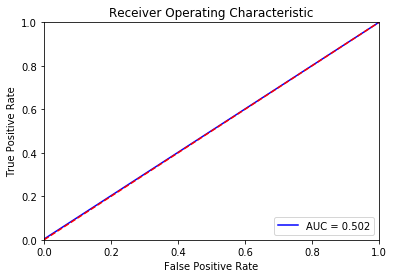

In [34]:
# Plot outputs
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline

# # calculate the fpr and tpr for all thresholds of the classification
# probs = regr.predict_proba(X_test)
# preds = probs[:,1]
# fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
# roc_auc = metrics.auc(fpr, tpr)
# print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Question 3.1: Apply stratisfied tain test split to account for class imbalance

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    stratify=target, 
                                                    test_size=0.2)
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std_scaled = scaler.transform(X_train)
X_test_std_scaled = scaler.transform(X_test)

### Question 3.2: Apply RFE with a logistic regression model on the stratisfied training data testing out different number of features. Predict the test data and plot the ROC curve.

In [36]:
regr = RFE(LogisticRegression(solver='lbfgs', max_iter= 10000, random_state=5), n_features_to_select=40, step=1)
regr.fit(X_train_std_scaled, y_train)

RFE(estimator=LogisticRegression(max_iter=10000, random_state=5),
    n_features_to_select=40)

Accuracy: 0.9331210191082803
AUC: 0.678774581504957


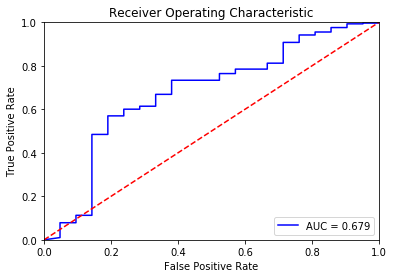

In [37]:
%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
y_pred = regr.predict(X_test_std_scaled)
lr_acc = accuracy_score(y_test, y_pred)

probs = regr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Question 4.1: Apply stratisfied K-Fold split where K=5 to the above data 

In [38]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold

skf = StratifiedKFold(n_splits=5)
model = LogisticRegression(solver = 'lbfgs', max_iter=500)
results = cross_val_score(model, X_train_std_scaled, y_train, cv=skf)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 89.86% (1.14%)


In [39]:
kfold = KFold(n_splits=5)
model = LogisticRegression(solver = 'lbfgs', max_iter=500)
results = cross_val_score(model, X_train_std_scaled, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 89.22% (2.38%)


In [40]:
from sklearn.model_selection import cross_val_predict
skf = StratifiedKFold(n_splits=5)
model = LogisticRegression(solver = 'lbfgs', max_iter=500)
results = cross_val_score(model, X_train_std_scaled, y_train, cv=skf)
crossval_scores = cross_val_score(model, X_train_std_scaled, y_train, scoring='roc_auc', cv=skf)

### Implement the model and then create the ROC Curve

In [41]:
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
cv = StratifiedKFold(n_splits=5)
clf = LogisticRegression(solver = 'lbfgs', max_iter=500)

x = np.any(np.isnan(X_train_std_scaled))
x = np.all(np.isfinite(x))
y = np.any(np.isnan(y_train))

kf = KFold(n_splits=10)

tprs = []
base_fpr = np.linspace(0, 1, 101)

plt.figure(figsize=(5, 5))

for i, (train, test) in enumerate(kf):
    model = LogisticRegression().fit(X[train], y[train])
    y_score = model.predict_proba(X[test])
    fpr, tpr, _ = roc_curve(y[test], y_score[:, 1])

    plt.plot(fpr, tpr, 'b', alpha=0.15)
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std


plt.plot(base_fpr, mean_tprs, 'b')
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.axes().set_aspect('equal', 'datalim')

TypeError: 'KFold' object is not iterable

<Figure size 360x360 with 0 Axes>

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# from sklearn import svm, datasets
# from sklearn.metrics import auc
# from sklearn.metrics import RocCurveDisplay
# from sklearn.model_selection import StratifiedKFold

# # #############################################################################
# # Data IO and generation

# # Import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# X, y = X[y != 2], y[y != 2]
# n_samples, n_features = X.shape

# # Add noisy features
# random_state = np.random.RandomState(0)
# X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# # #############################################################################
# # Classification and ROC analysis

# # Run classifier with cross-validation and plot ROC curves
# cv = StratifiedKFold(n_splits=6)
# classifier = svm.SVC(kernel="linear", probability=True, random_state=random_state)

# tprs = []
# aucs = []
# mean_fpr = np.linspace(0, 1, 100)

# fig, ax = plt.subplots()
# for i, (train, test) in enumerate(cv.split(X, y)):
#     classifier.fit(X[train], y[train])
#     viz = RocCurveDisplay.from_estimator(
#         classifier,
#         X[test],
#         y[test],
#         name="ROC fold {}".format(i),
#         alpha=0.3,
#         lw=1,
#         ax=ax,
#     )
#     interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
#     interp_tpr[0] = 0.0
#     tprs.append(interp_tpr)
#     aucs.append(viz.roc_auc)

# ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

# mean_tpr = np.mean(tprs, axis=0)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# std_auc = np.std(aucs)
# ax.plot(
#     mean_fpr,
#     mean_tpr,
#     color="b",
#     label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
#     lw=2,
#     alpha=0.8,
# )

# std_tpr = np.std(tprs, axis=0)
# tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
# tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(
#     mean_fpr,
#     tprs_lower,
#     tprs_upper,
#     color="grey",
#     alpha=0.2,
#     label=r"$\pm$ 1 std. dev.",
# )

# ax.set(
#     xlim=[-0.05, 1.05],
#     ylim=[-0.05, 1.05],
#     title="Receiver operating characteristic example",
# )
# ax.legend(loc="lower right")
# plt.show()

In [ ]:
# # Plot the ROC curve
# y_pred = results.predict(X_test_std_scaled)
# lr_acc = accuracy_score(y_test, y_pred)

# probs = results.predict_proba(X_test)
# preds = probs[:,1]
# fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
# roc_auc = crossval_scores

# print("Accuracy: {}".format(lr_acc))
# print("AUC: {}".format(roc_auc))

# # Plot the ROC curve
# import matplotlib.pyplot as plt
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

### Question 4.2: Summarize your findings of all above models

### Question 5. Create a new text cell in your Notebook: Complete a 50-100 word summary(or short description of your thinking in applying this week's learning to the solution)of your experience in this assignment. Include:
                                                                      
- What was your incoming experience with this model, if any?
- What steps you took, what obstacles you encountered.
- How you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)